In [1]:
## Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import re
import os
import nltk
import nltk.corpus

In [2]:
# Downloading nltk packages
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
## Obtaining and cleaning the data
train_data = pd.read_csv("sample_prccd_train.csv")
X_train = train_data["item"]
y_train = train_data["label"]

X_train = X_train.str.lower()
X_train = X_train.apply(lambda elem: re.sub(r"\d+", "", elem))
X_train = X_train.apply(lambda x : nltk.word_tokenize(x))
X_train = X_train.apply(lambda x : " ".join([word for word in x if word not in (nltk.corpus.stopwords.words() + ["httpaddress", "rt", "userid", "usrid", "http"])]))

X_train = X_train.to_numpy()
y_train = y_train.to_numpy()


In [10]:
print(X_train)

['cyclone pam hits zealand dominion post'
 '# cylonepam devastates # vanuatu regional disaster # insurance scheme fund gvt rebuilding efforts # wcdrr'
 'emergency response teams australia vanuatu dozens feared # tc' ...
 'pray victimes hope international community provide adequat # cyclonepam'
 'cyclone pam monster forced vanuatu start president # worldnews'
 'tropical cyclone pam australian officials locate missing volunteers vanuatu # ann']


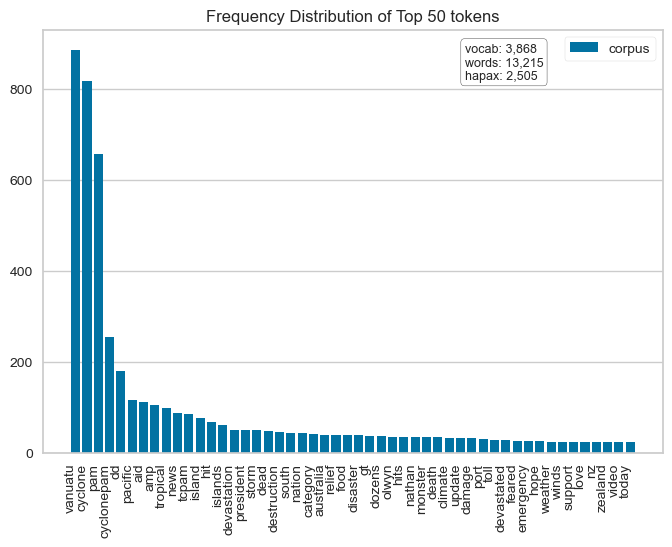

<AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [12]:
## Visualizing frequency for top words

%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(X_train)
features   = vectorizer.get_feature_names_out()
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

Not related or irrelevant tweets


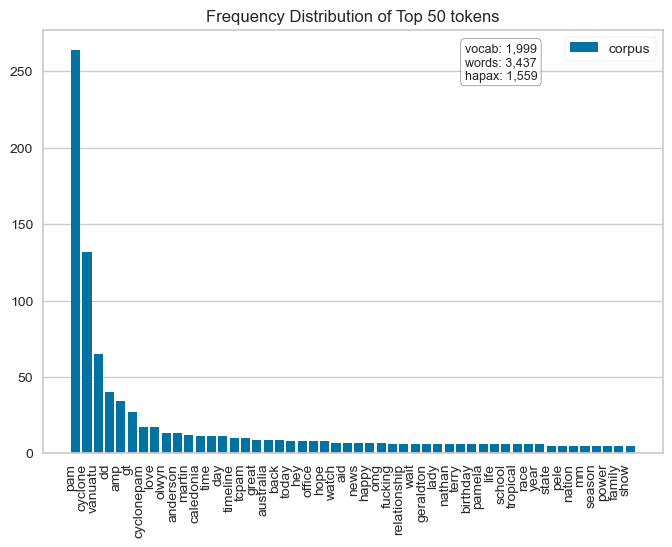

Infrastructure and utilities tweets


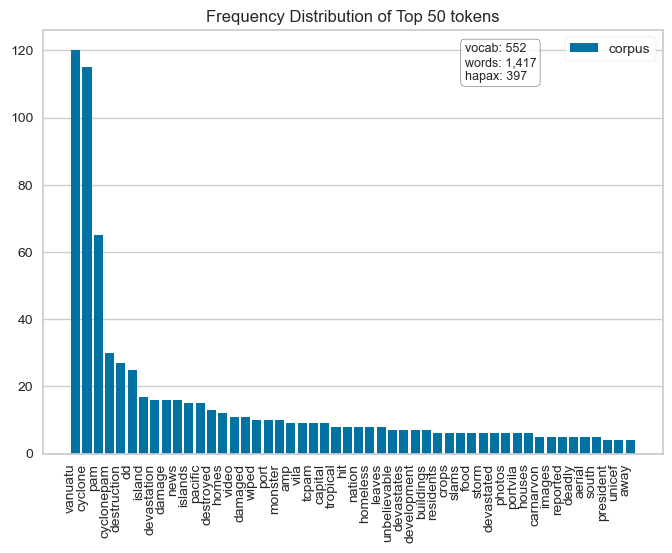

Affected individuals tweets


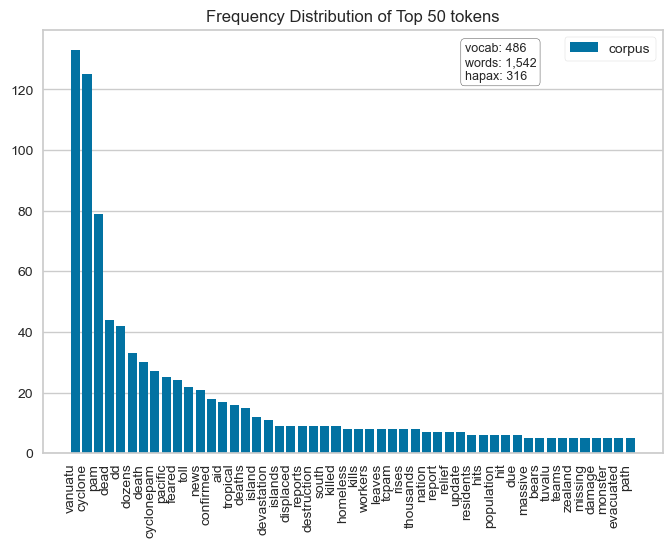

Other tweets


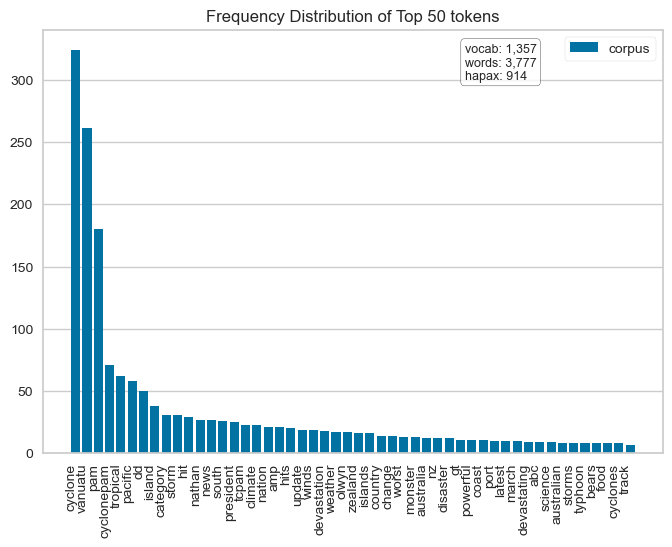

<AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [14]:
unrelated_vectorizer = CountVectorizer()
unrelated_docs = unrelated_vectorizer.fit_transform(X_train[y_train == "Not related or irrelevant"])
unrelated_features = unrelated_vectorizer.get_feature_names_out()
unrelated_visualizer = FreqDistVisualizer(features=unrelated_features, orient='v')
unrelated_visualizer.fit(unrelated_docs)
print("Not related or irrelevant tweets")
unrelated_visualizer.show()

infra_vectorizer = CountVectorizer()
infra_docs = infra_vectorizer.fit_transform(X_train[y_train == "Infrastructure and utilities"])
infra_features = infra_vectorizer.get_feature_names_out()
infra_visualizer = FreqDistVisualizer(features=infra_features, orient='v')
infra_visualizer.fit(infra_docs)
print("Infrastructure and utilities tweets")
infra_visualizer.show()

affected_vectorizer = CountVectorizer()
affected_docs = affected_vectorizer.fit_transform(X_train[y_train == "Affected individuals"])
affected_features = affected_vectorizer.get_feature_names_out()
affected_visualizer = FreqDistVisualizer(features=affected_features, orient='v')
affected_visualizer.fit(affected_docs)
print("Affected individuals tweets")
affected_visualizer.show()


other_vectorizer = CountVectorizer()
other_docs = other_vectorizer.fit_transform(X_train[y_train == "Other Useful Information"])
other_features = other_vectorizer.get_feature_names_out()
other_visualizer = FreqDistVisualizer(features=other_features, orient='v')
other_visualizer.fit(other_docs)
print("Other tweets")
other_visualizer.show()

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=10)
X_train = vectorizer.fit_transform(X_train)

In [33]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dtc1 = DecisionTreeClassifier(max_depth=20)
dtc2 = DecisionTreeClassifier(max_depth=2)

print(type(X_train))

dtc1.fit(X_train, range(len(y_train)))
dtc2.fit(X_train, range(len(y_train)))

<class 'scipy.sparse.csr.csr_matrix'>


DecisionTreeClassifier(max_depth=2)

In [28]:
print(vectorizer.get_feature_names_out())
print(type(X_train))
print(X_train)
print(type(y_train))
print(y_train)

print(vectorizer.get_feature_names_out()[108])
print(vectorizer.get_feature_names_out()[176])
print(vectorizer.get_feature_names_out()[70])
print(vectorizer.get_feature_names_out()[101])
print(vectorizer.get_feature_names_out()[31])

['abc' 'affected' 'agencies' 'aid' 'amp' 'anderson' 'appeal' 'appeals'
 'assist' 'assistance' 'auspol' 'australia' 'australian' 'back' 'bears'
 'begin' 'big' 'caledonia' 'capital' 'carnarvon' 'category' 'caused'
 'change' 'children' 'climate' 'cnn' 'coast' 'communities' 'confirmed'
 'country' 'cross' 'cyclone' 'cyclonepam' 'cyclones' 'damage' 'damaged'
 'day' 'days' 'dd' 'dead' 'deadly' 'death' 'deaths' 'destroyed'
 'destruction' 'devastated' 'devastates' 'devastating' 'devastation'
 'direct' 'disaster' 'displaced' 'donate' 'dozens' 'due' 'emergency'
 'families' 'family' 'feared' 'fears' 'find' 'flooding' 'follow' 'food'
 'friends' 'great' 'gt' 'heads' 'health' 'hit' 'hits' 'homeless' 'homes'
 'hope' 'htt' 'humanitarian' 'international' 'island' 'islands' 'latest'
 'leaves' 'left' 'life' 'live' 'love' 'make' 'makes' 'march' 'martin'
 'massive' 'monster' 'morning' 'mt' 'nathan' 'nation' 'news' 'north' 'nz'
 'office' 'olwyn' 'pacific' 'pam' 'path' 'photos' 'pm' 'population' 'port'
 'port

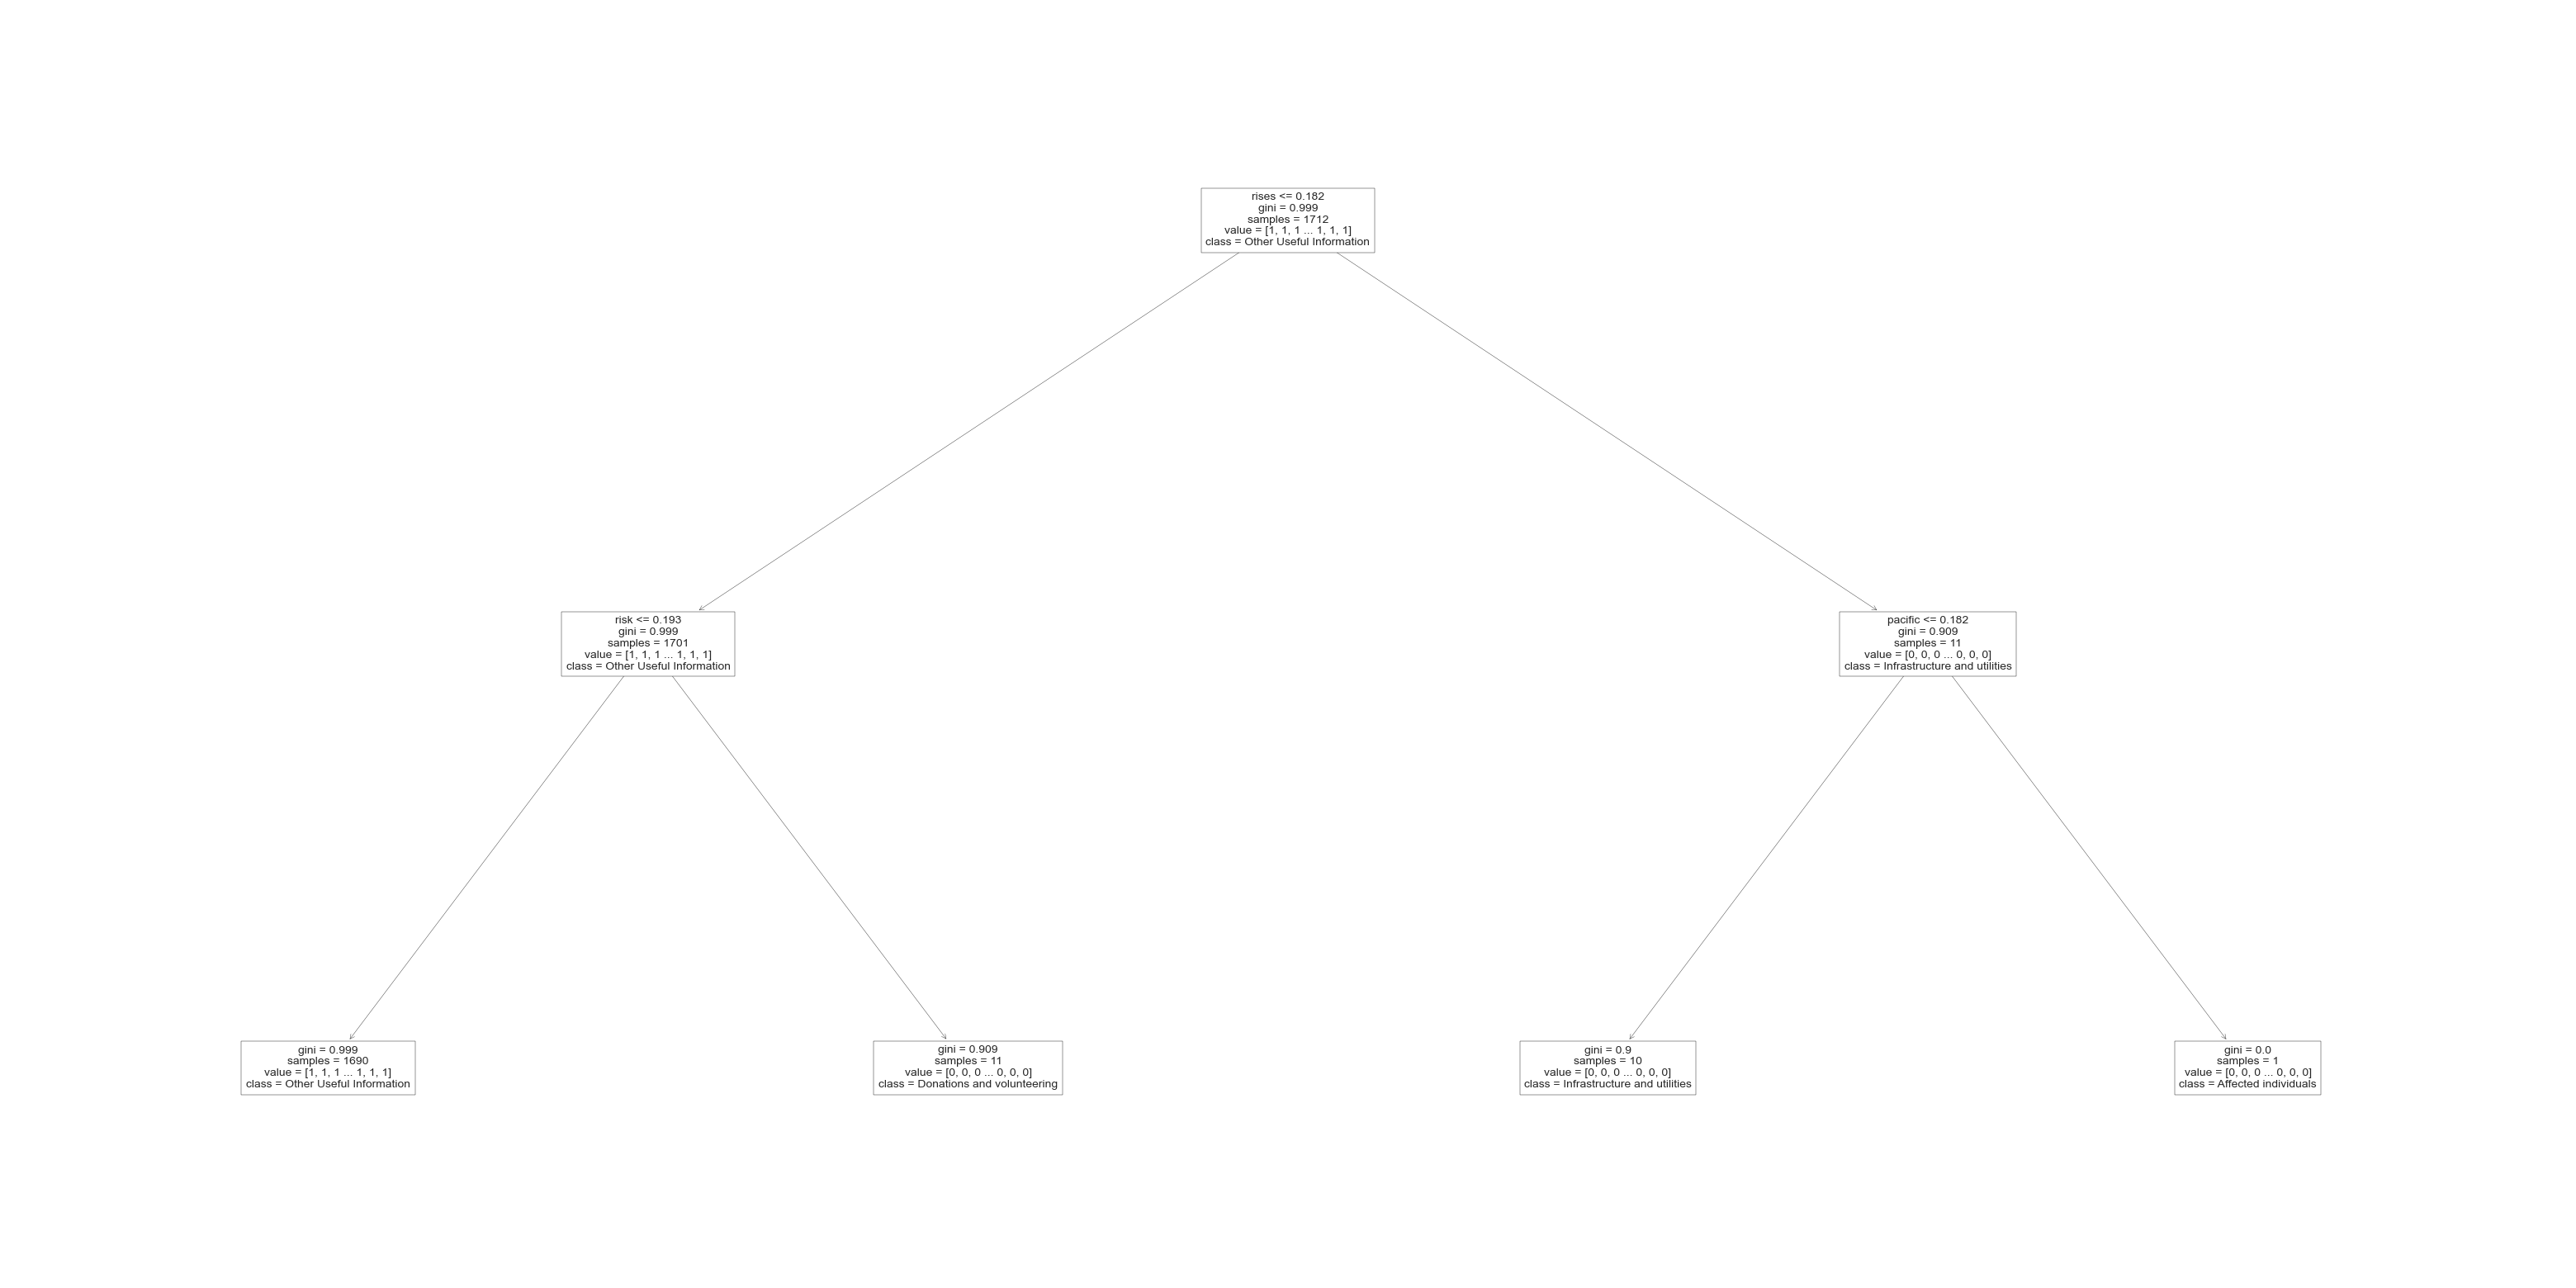

In [34]:
# plt.figure(figsize=(50,50))
# plot_tree(dtc1, feature_names=vectorizer.get_feature_names_out(), class_names=y_train, fontsize=10)
# plt.show()
plt.figure(figsize=(40, 20))
plot_tree(dtc2, feature_names=vectorizer.get_feature_names_out(), class_names=y_train, fontsize=10)
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier(hidden_layer_sizes=(100, 100, 40), random_state=1)
mlpc.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(100, 100, 40), random_state=1)